# Relationship finding with WordNet


Wordnet is a database of word relationships that includes over 80000 noun-noun relationship as well as verb and other relationships. Python includes a WordNet implementation that allows for the exploration of relationships that are included in the collected infrastructure reviews. 

This notebook is broken down into three sections:

1. Exploring WordNet
2. Computing similarity score
3. Graphical representation of keywords

## 1. Exploring WordNet 
To get a better sense of WordNet and what it can do, we can first take a look at different options that WordNet provides to us. First we can search for a word in WordNet by searching for it via WordNet's synsets method. After finding the word that we were looking for, we can also take a look at its lemmas (synonyms) and hyponyms, words that have an "is a" relationship with that particular word. However, as seen in the section below not all words have hyponyms, which might later be an isssue when trying to determine relationships betwee words in a specific domain. 

In [1]:
# load wordnet
from nltk.corpus import wordnet as wn

In [8]:
# check out synonym set of word park
wn.synsets('park')

[Synset('park.n.01'),
 Synset('park.n.02'),
 Synset('ballpark.n.01'),
 Synset('park.n.04'),
 Synset('parking_lot.n.01'),
 Synset('park.n.06'),
 Synset('park.v.01'),
 Synset('park.v.02')]

In [10]:
for synset in list(wn.synsets('park')):
    print(synset.lemma_names())

['park', 'parkland']
['park', 'commons', 'common', 'green']
['ballpark', 'park']
['Park', 'Mungo_Park']
['parking_lot', 'car_park', 'park', 'parking_area']
['park']
['park']
['park']


In [3]:
# check out is a relationships of word park 
wn.synset('park.n.01').hyponyms() 

[Synset('national_park.n.01'), Synset('safari_park.n.01')]

In [12]:
# examine the path of entities that park relates to 
wn.synsets('park')[0].hypernym_paths()

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('location.n.01'),
  Synset('region.n.03'),
  Synset('geographical_area.n.01'),
  Synset('tract.n.01'),
  Synset('park.n.01')]]

In [4]:
wn.synsets('streetlight') 

[Synset('streetlight.n.01')]

In [5]:
wn.synset('streetlight.n.01').hyponyms() 

[]

In [6]:
wn.synset('streetlight.n.01').lemma_names()

['streetlight', 'street_lamp']

As seen in the case of street light, there are not many different definitions and hyponyms of the word streetlight.

In [14]:
wn.synsets('street_lamp') 

[Synset('streetlight.n.01')]

In [16]:
wn.synsets('streetlight')[0].min_depth()

9

In [37]:
wn.synsets('traffic_light') 

[Synset('traffic_light.n.01')]

In [38]:
wn.synset('traffic_light.n.01').hyponyms() 

[Synset('green_light.n.01'),
 Synset('red_light.n.02'),
 Synset('yellow_light.n.01')]

In [39]:
wn.synset('traffic_light.n.01').lemma_names()

['traffic_light', 'traffic_signal', 'stoplight']

## 2. Relationship detection and similarity scores
The dataset of urban infrastructure related comments contains many different topics and words. To better gauge how different keywords and sentences are related to one another, the following section details two different approaches on similiarty computation. 


### 2.1 Computing sentences relationships with Wordnet 
To determine the similarity between two sentences one can take multiple approaches. The approach taken here is based off of the paper Farkiya, Alabhya, et al. "Natural Language Processing using NLTK and WordNet." (2015): 5465-5469. The paper offers an approach to calculatiing sentence similarity by computing the similarity between all word pairs in the two sentences and averaging the the similarity scores to get a final score. 

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [19]:
# create list of stopwords 
stop_words = set(stopwords.words('english'))

In [17]:
# two sample sentences 
s1 = 'Red light right hand side burnt (cavendish) side of police station'
s2 = 'Burnt out Red light from Mackle to turn right on cavendish south. From Shell.'

In [27]:
# clean the sentences removing stopwords and digits/punctuations
word_tokens1 = word_tokenize(s1)
filtered_sentence1 = [w.lower() for w in word_tokens1 if not w.lower() in stop_words]
filtered_sentence1 = [w for w in filtered_sentence2 if w.isalpha()]

word_tokens2 = word_tokenize(s2)
filtered_sentence2 = [w.lower() for w in word_tokens2 if not w.lower() in stop_words]
filtered_sentence2 = [w for w in filtered_sentence2 if w.isalpha()]

In [28]:
filtered_sentence1, filtered_sentence2

(['burnt',
  'red',
  'light',
  'mackle',
  'turn',
  'right',
  'cavendish',
  'south',
  'shell'],
 ['burnt',
  'red',
  'light',
  'mackle',
  'turn',
  'right',
  'cavendish',
  'south',
  'shell'])

In [30]:
sentences = 'Red light right hand side burnt (cavendish) side of police station'
target_sentence = 'Burnt out Red light from Mackle to turn right on cavendish south. From Shell.'

In [31]:
stop = stopwords.words('english')
goodwords= [i for i in sentences.split() if i not in stop]
goodwords1= [i for i in target_sentence.split() if i not in stop]

In [489]:
# compute similarity score between the two sentences 
m=0
n=0
l=[]
fl=[]
for m,p in enumerate(goodwords):
    for n,q in enumerate (goodwords1):
        xx = wn.synsets(p)
        if len(wn.synsets(q)) > 0:
            y = wn.synsets(q)[0]
        del l[:]
        for x in xx:
            if (x.wup_similarity(y))==None:
                l.append(0)
            else:
                l.append(x.wup_similarity(y))
        try:
            fl.append(max(l))
        except:
            fl.append(0)
score=sum(fl)/len(fl) 

In [490]:
# similarity score of two sentences 
score

0.36554609777907

The similarity scores range from 0 to 1. From the calculations, one can see that the two sentences above have a very low similarity score despite discussing a similar topic. Therefore, there might need to be improvements to this method of computing similarity. 

### 2.2 Comparing keyword similarity 
My fellow intern, Abhay Mahajan, created a manual binary matrix indicating if two words are related. This section focuses on comparing the relationships that were manually coded with the ones that WordNet finds.

In [118]:
import pandas as pd

In [491]:
# read in manually created relationship matrix 
df_full = pd.read_excel('relations.xlsx',index_col = 0)
df_full

,park,street,light,road,city,walking,sidewalk,clean,sign,play,...,crosswalk,damaged,accessible,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107
park,1,0,1,0,1,1,0,1,1,0,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street,0,1,1,1,1,1,0,1,1,0,...,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
light,1,1,1,1,1,0,1,0,0,0,...,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
road,0,1,1,1,1,1,1,1,1,0,...,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1,1,1,1,1,1,1,1,1,1,...,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
weed,1,0,0,0,1,0,0,1,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sit,1,0,0,0,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crosswalk,0,1,1,1,1,1,1,1,1,0,...,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
damaged,0,1,1,1,0,0,1,0,0,0,...,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [492]:
# clean dataframe
df_full = df_full.sort_index()
df_full = df_full.T[:100]
df_full = df_full.sort_index()
df_full

,access,accessible,air,asphalt,avenue,ball,bathroom,bbq,beach,bench,...,traffic,trail,train,trash,tree,underpass,view,walking,washroom,weed
access,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
accessible,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
air,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
asphalt,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
avenue,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
underpass,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
view,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
walking,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
washroom,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


We have a list of 100 keywords that are also part of the matrix that was manually coded. However to compare the manual matrix with the similarity scores in wordnet, the correct synsets have to be identified. 

In [148]:
# read in file with keywords
with open("keywordsOnly.txt", "r") as file:
    lines = file.readlines()
    lines = [line.strip() for line in lines]
    print(lines)

['park', 'street', 'light', 'road', 'city', 'walking', 'sidewalk', 'clean', 'play', 'snow', 'picnic', 'broken', 'maintained', 'trail', 'stop', 'garbage', 'parking', 'pool', 'tree', 'bus', 'playground', 'bike', 'traffic', 'grass', 'path', 'car', 'pothole', 'pole', 'bench', 'table', 'running', 'station', 'metro', 'lawn', 'fountain', 'branch', 'removal', 'graffiti', 'hole', 'track', 'streetlight', 'construction', 'sewer', 'ice', 'view', 'driveway', 'river', 'rink', 'free', 'sign', 'biking', 'line', 'property', 'lake', 'jogging', 'access', 'trash', 'forest', 'spot', 'skating', 'bin', 'underpass', 'lamp', 'cycling', 'facility', 'pond', 'building', 'fence', 'flower', 'asphalt', 'sit', 'drain', 'dirty', 'beach', 'bbq', 'bathroom', 'blossom', 'washroom', 'ride', 'lane', 'noise', 'dump', 'crack', 'glass', 'toilet', 'sand', 'avenue', 'intersection', 'accessible', 'pedestrian', 'train', 'weed', 'damaged', 'rusted', 'hiking', 'restaurant', 'crosswalk', 'skiing', 'air', 'ball']


In [153]:
# find all of the synset for words and save in dictionary 
synsetDict = {}
for word in lines:
    synsetDict[word] = wn.synsets(word)

Having saved all of the possible synsets for each words in a dictionary, the next step involves choosing the correct synset that matches up with the definition we are looking for. Since many words have more than one definition, reading through each can help to determine which one we want to use. 

In [155]:
for keyword, syns in synsetDict.items():
    print('***')
    print('keyword', keyword)
    for s in syns:
        print(s, s.definition())

***
keyword park
1
Synset('park.n.01') a large area of land preserved in its natural state as public property
Synset('park.n.02') a piece of open land for recreational use in an urban area
Synset('ballpark.n.01') a facility in which ball games are played (especially baseball games)
Synset('park.n.04') Scottish explorer in Africa (1771-1806)
Synset('parking_lot.n.01') a lot where cars are parked
Synset('park.n.06') a gear position that acts as a parking brake
Synset('park.v.01') place temporarily
Synset('park.v.02') maneuver a vehicle into a parking space
***
keyword street
2
Synset('street.n.01') a thoroughfare (usually including sidewalks) that is lined with buildings
Synset('street.n.02') the part of a thoroughfare between the sidewalks; the part of the thoroughfare on which vehicles travel
Synset('street.n.03') the streets of a city viewed as a depressed environment in which there is poverty and crime and prostitution and dereliction
Synset('street.n.04') a situation offering opport

Synset('frost.v.01') decorate with frosting
Synset('ice.v.02') cause to become ice or icy
Synset('ice.v.03') put ice on or put on ice
***
keyword view
45
Synset('position.n.03') a way of regarding situations or topics etc.
Synset('view.n.02') the visual percept of a region
Synset('view.n.03') the act of looking or seeing or observing
Synset('view.n.04') the range of the eye
Synset('opinion.n.01') a personal belief or judgment that is not founded on proof or certainty
Synset('opinion.n.02') a message expressing a belief about something; the expression of a belief that is held with confidence but not substantiated by positive knowledge or proof
Synset('view.n.07') purpose; the phrase `with a view to' means `with the intention of' or `for the purpose of'
Synset('scene.n.08') graphic art consisting of the graphic or photographic representation of a visual percept
Synset('horizon.n.02') the range of interest or activity that can be anticipated
Synset('view.n.10') outward appearance
Synset('

Synset('ball.n.06') a spherical object used as a plaything
Synset('ball.n.07') United States comedienne best known as the star of a popular television program (1911-1989)
Synset('ball.n.08') a compact mass
Synset('ball.n.09') a lavish dance requiring formal attire
Synset('ball.n.10') a more or less rounded anatomical body or mass
Synset('ball.n.11') the game of baseball
Synset('ball.n.12') a pitch that is not in the strike zone
Synset('ball.v.01') form into a ball by winding or rolling


In [158]:
synsetList = ['park.n.02', 'street.n.02', 'light.n.02', 'road.n.01', 'city.n.01', 'walk.v.01', 'sidewalk.n.01',
              'clean.v.01', 'sign.n.02', 'play.n.08', 'snow.n.01', 'picnic.n.03', 'broken.a.01', 'kept_up.s.01', 
              'trail.n.02', 'stop.n.05', 'garbage.n.01', 'parking.n.01', 'pool.n.01', 'tree.n.01', 'bus.n.01',
              'playground.n.02', 'bicycle.n.01', 'traffic.n.01', 'grass.n.01', 'path.n.04', 'car.n.01', 
              'pothole.n.01', 'pole.n.01', 'bench.n.01', 'table.n.02', 'run.v.01', 'station.n.01', 'metro.n.01',
              'lawn.n.01', 'fountain.n.01', 'branch.n.02', 'removal.n.01', 'graffito.n.01', 'hole.n.05', 
              'track.n.10', 'streetlight.n.01', 'construction.n.01', 'sewer.n.01', 'ice.n.01', 'view.n.02', 
              'driveway.n.01', 'river.n.01', 'rink.n.01', 'free.v.07', 'bicycle.v.01', 'line.n.02', 'property.n.01',
              'lake.n.01', 'jogging.n.01', 'access.n.03', 'rubbish.n.01', 'forest.n.01', 'topographic_point.n.01',
              'skating.n.01', 'bin.n.01', 'underpass.n.01','lamp.n.01', 'cycling.n.01', 'facility.n.01', 'pond.n.01', 
              'building.n.01', 'fence.n.01', 'flower.n.01', 'asphalt.n.01', 'sit.v.01','drain.n.03', 'dirty.v.01',
              'beach.n.01','barbecue.n.02','bathroom.n.01','bloom.v.01','washroom.n.01','ride.v.02', 'lane.n.01',
              'noise.n.01', 'dump.n.02', 'crack.n.01',  'glass.n.01', 'toilet.n.01', 'sand.n.01', 'avenue.n.02',
              'intersection.n.02', 'accessible.a.01', 'pedestrian.n.01', 'train.n.01', 'weed.n.01', 'damage.v.02',
              'rusted.a.01', 'hike.v.02', 'restaurant.n.01', 'crossing.n.05','skiing.n.01', 'air.n.01','ball.n.01'             
             ]

Having extracted all of the relevant synset, the next step involves creating a mapping between each keyword and the corresponding synset. This will allow for easy access later on. 

In [396]:
# Create mapping between keyword and matching synset
valDict = {}
for i in range(len(lines)):
    valDict[lines[i]] = synsetList[i]

In [397]:
valDict

{'park': 'park.n.02',
 'street': 'street.n.02',
 'light': 'light.n.02',
 'road': 'road.n.01',
 'city': 'city.n.01',
 'walking': 'walk.v.01',
 'sidewalk': 'sidewalk.n.01',
 'clean': 'clean.v.01',
 'play': 'sign.n.02',
 'snow': 'play.n.08',
 'picnic': 'snow.n.01',
 'broken': 'picnic.n.03',
 'maintained': 'broken.a.01',
 'trail': 'kept_up.s.01',
 'stop': 'trail.n.02',
 'garbage': 'stop.n.05',
 'parking': 'garbage.n.01',
 'pool': 'parking.n.01',
 'tree': 'pool.n.01',
 'bus': 'tree.n.01',
 'playground': 'bus.n.01',
 'bike': 'playground.n.02',
 'traffic': 'bicycle.n.01',
 'grass': 'traffic.n.01',
 'path': 'grass.n.01',
 'car': 'path.n.04',
 'pothole': 'car.n.01',
 'pole': 'pothole.n.01',
 'bench': 'pole.n.01',
 'table': 'bench.n.01',
 'running': 'table.n.02',
 'station': 'run.v.01',
 'metro': 'station.n.01',
 'lawn': 'metro.n.01',
 'fountain': 'lawn.n.01',
 'branch': 'fountain.n.01',
 'removal': 'branch.n.02',
 'graffiti': 'removal.n.01',
 'hole': 'graffito.n.01',
 'track': 'hole.n.05',
 'st

The next step involves computing the similarity between two words and saving them in a dataframe that indicates scores between 0 and 1, where 0 indicates the highest similarity. 

In [400]:
# compute path similarity between each pair of words 
similarityDict = {}
for word in sorted(lines):
    simList = []
    for otherWord in sorted(lines):
        word1 = valDict[word]
        word2 = valDict[otherWord]
        simList.append(wn.synset(word1).path_similarity(wn.synset(word2)))
    similarityDict[word] = simList

In [417]:
similarityDf = pd.DataFrame.from_dict(similarityDict)
similarityDf.set_index([sorted(lines)], inplace=True)

In [420]:
similarityDf

,access,accessible,air,asphalt,avenue,ball,bathroom,bbq,beach,bench,...,traffic,trail,train,trash,tree,underpass,view,walking,washroom,weed
access,1.000000,NaN,0.100000,0.200000,0.166667,0.142857,0.142857,0.071429,0.142857,0.142857,...,0.142857,NaN,0.142857,0.090909,0.200000,0.166667,0.100000,0.100000,0.125000,0.111111
accessible,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,NaN,NaN
air,0.100000,NaN,1.000000,0.100000,0.076923,0.083333,0.083333,0.090909,0.125000,0.083333,...,0.083333,NaN,0.083333,0.125000,0.100000,0.076923,0.142857,0.111111,0.076923,0.083333
asphalt,0.200000,NaN,0.100000,1.000000,0.125000,0.142857,0.142857,0.071429,0.142857,0.142857,...,0.142857,NaN,0.142857,0.090909,0.200000,0.125000,0.100000,0.100000,0.125000,0.111111
avenue,0.166667,NaN,0.076923,0.125000,1.000000,0.100000,0.100000,0.058824,0.100000,0.100000,...,0.100000,NaN,0.100000,0.071429,0.125000,0.111111,0.076923,0.076923,0.090909,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
underpass,0.166667,NaN,0.076923,0.125000,0.111111,0.100000,0.100000,0.058824,0.100000,0.100000,...,0.100000,NaN,0.100000,0.071429,0.125000,1.000000,0.076923,0.076923,0.090909,0.083333
view,0.100000,NaN,0.142857,0.100000,0.076923,0.083333,0.083333,0.090909,0.125000,0.083333,...,0.083333,NaN,0.083333,0.125000,0.100000,0.076923,1.000000,0.111111,0.076923,0.083333
walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
washroom,0.125000,NaN,0.076923,0.125000,0.090909,0.100000,0.250000,0.058824,0.100000,0.100000,...,0.100000,NaN,0.100000,0.071429,0.125000,0.090909,0.076923,0.076923,1.000000,0.083333


Since some words do not have relationships with others they will appear as NaN, therefore the easiest way to deal with them is to replace them with zeros. This type of coding will not be perfect as it will distort the relationship for some words. Howeve,. this approach can be refined later on. 

In [432]:
# replace all na values with 0s 
similarityDf1 = similarityDf.fillna(0)
similarityDf1

,access,accessible,air,asphalt,avenue,ball,bathroom,bbq,beach,bench,...,traffic,trail,train,trash,tree,underpass,view,walking,washroom,weed
access,1.000000,0.0,0.100000,0.200000,0.166667,0.142857,0.142857,0.071429,0.142857,0.142857,...,0.142857,0.0,0.142857,0.090909,0.200000,0.166667,0.100000,0.100000,0.125000,0.111111
accessible,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000
air,0.100000,0.0,1.000000,0.100000,0.076923,0.083333,0.083333,0.090909,0.125000,0.083333,...,0.083333,0.0,0.083333,0.125000,0.100000,0.076923,0.142857,0.111111,0.076923,0.083333
asphalt,0.200000,0.0,0.100000,1.000000,0.125000,0.142857,0.142857,0.071429,0.142857,0.142857,...,0.142857,0.0,0.142857,0.090909,0.200000,0.125000,0.100000,0.100000,0.125000,0.111111
avenue,0.166667,0.0,0.076923,0.125000,1.000000,0.100000,0.100000,0.058824,0.100000,0.100000,...,0.100000,0.0,0.100000,0.071429,0.125000,0.111111,0.076923,0.076923,0.090909,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
underpass,0.166667,0.0,0.076923,0.125000,0.111111,0.100000,0.100000,0.058824,0.100000,0.100000,...,0.100000,0.0,0.100000,0.071429,0.125000,1.000000,0.076923,0.076923,0.090909,0.083333
view,0.100000,0.0,0.142857,0.100000,0.076923,0.083333,0.083333,0.090909,0.125000,0.083333,...,0.083333,0.0,0.083333,0.125000,0.100000,0.076923,1.000000,0.111111,0.076923,0.083333
walking,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
washroom,0.125000,0.0,0.076923,0.125000,0.090909,0.100000,0.250000,0.058824,0.100000,0.100000,...,0.100000,0.0,0.100000,0.071429,0.125000,0.090909,0.076923,0.076923,1.000000,0.083333


The second similiarty measure, aside from path similarity is the Wu-Palmer similarity measure. This measure will be used as well to compute similarity between each keyword. 

In [423]:
# compute wu-palmer similarity between pairs of keywords
wupSimilarityDict = {}
for word in sorted(lines):
    simList = []
    for otherWord in sorted(lines):
        word1 = valDict[word]
        word2 = valDict[otherWord] 
        simList.append(wn.synset(word1).wup_similarity(wn.synset(word2)))
    wupSimilarityDict[word] = simList

In [427]:
# save similarity in dataframe 
wupSimilarityDf = pd.DataFrame.from_dict(wupSimilarityDict)
wupSimilarityDf.set_index([sorted(lines)], inplace=True)

In [428]:
wupSimilarityDf

,access,accessible,air,asphalt,avenue,ball,bathroom,bbq,beach,bench,...,traffic,trail,train,trash,tree,underpass,view,walking,washroom,weed
access,1.000000,NaN,0.307692,0.714286,0.705882,0.625000,0.625000,0.235294,0.500000,0.625000,...,0.625000,NaN,0.625000,0.285714,0.714286,0.705882,0.307692,0.181818,0.588235,0.500000
accessible,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,NaN,NaN
air,0.307692,NaN,1.000000,0.307692,0.250000,0.266667,0.266667,0.375000,0.363636,0.266667,...,0.266667,NaN,0.266667,0.461538,0.307692,0.250000,0.500000,0.200000,0.250000,0.266667
asphalt,0.714286,NaN,0.307692,1.000000,0.588235,0.625000,0.625000,0.235294,0.500000,0.625000,...,0.625000,NaN,0.625000,0.285714,0.714286,0.588235,0.307692,0.181818,0.588235,0.500000
avenue,0.705882,NaN,0.250000,0.588235,1.000000,0.526316,0.526316,0.200000,0.400000,0.526316,...,0.526316,NaN,0.526316,0.235294,0.588235,0.600000,0.250000,0.142857,0.500000,0.421053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
underpass,0.705882,NaN,0.250000,0.588235,0.600000,0.526316,0.526316,0.200000,0.400000,0.526316,...,0.526316,NaN,0.526316,0.235294,0.588235,1.000000,0.250000,0.142857,0.500000,0.421053
view,0.307692,NaN,0.500000,0.307692,0.250000,0.266667,0.266667,0.375000,0.363636,0.266667,...,0.266667,NaN,0.266667,0.461538,0.307692,0.250000,1.000000,0.200000,0.250000,0.266667
walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
washroom,0.588235,NaN,0.250000,0.588235,0.500000,0.526316,0.842105,0.200000,0.400000,0.526316,...,0.526316,NaN,0.526316,0.235294,0.588235,0.500000,0.250000,0.142857,1.000000,0.421053


Similary to the first similarity measure, there are certain words that do not have a similarity measure. Therefore all of these cells will be filled with zeros. 

In [431]:
# fill empty cells with 0s 
wupSimilarityDf1 = wupSimilarityDf.fillna(0)
wupSimilarityDf1

,access,accessible,air,asphalt,avenue,ball,bathroom,bbq,beach,bench,...,traffic,trail,train,trash,tree,underpass,view,walking,washroom,weed
access,1.000000,0.0,0.307692,0.714286,0.705882,0.625000,0.625000,0.235294,0.500000,0.625000,...,0.625000,0.0,0.625000,0.285714,0.714286,0.705882,0.307692,0.181818,0.588235,0.500000
accessible,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000
air,0.307692,0.0,1.000000,0.307692,0.250000,0.266667,0.266667,0.375000,0.363636,0.266667,...,0.266667,0.0,0.266667,0.461538,0.307692,0.250000,0.500000,0.200000,0.250000,0.266667
asphalt,0.714286,0.0,0.307692,1.000000,0.588235,0.625000,0.625000,0.235294,0.500000,0.625000,...,0.625000,0.0,0.625000,0.285714,0.714286,0.588235,0.307692,0.181818,0.588235,0.500000
avenue,0.705882,0.0,0.250000,0.588235,1.000000,0.526316,0.526316,0.200000,0.400000,0.526316,...,0.526316,0.0,0.526316,0.235294,0.588235,0.600000,0.250000,0.142857,0.500000,0.421053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
underpass,0.705882,0.0,0.250000,0.588235,0.600000,0.526316,0.526316,0.200000,0.400000,0.526316,...,0.526316,0.0,0.526316,0.235294,0.588235,1.000000,0.250000,0.142857,0.500000,0.421053
view,0.307692,0.0,0.500000,0.307692,0.250000,0.266667,0.266667,0.375000,0.363636,0.266667,...,0.266667,0.0,0.266667,0.461538,0.307692,0.250000,1.000000,0.200000,0.250000,0.266667
walking,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
washroom,0.588235,0.0,0.250000,0.588235,0.500000,0.526316,0.842105,0.200000,0.400000,0.526316,...,0.526316,0.0,0.526316,0.235294,0.588235,0.500000,0.250000,0.142857,1.000000,0.421053


After having created multiple matrices, one with the manual coding and two others with similarity values calculated with different similarity measures it is time to compare them. To compare the accuracy of the manual coding in comparison with the manual coding the difference between the similarity score and the manual coding can be taken. Since similarity scores are continiuous values between 0 and 1 and the manual coding is just binary (1 or 0) the best way to compare them is to take the difference of the values and find a cutoff that indicates of the codig was correct. The threshold for the difference lies at 0.5. Therefore any values that are between -0.5 and 0.5 indicate that the manual coding and the wordnet similarity calculation match up. 

In [495]:
# dataframe that compares manual coding with similarity matrix from wordnet (compute difference)
comparisonDf = df_full.subtract(wupSimilarityDf1)
comparisonDf

,access,accessible,air,asphalt,avenue,ball,bathroom,bbq,beach,bench,...,traffic,trail,train,trash,tree,underpass,view,walking,washroom,weed
access,0.000000,1.0,-0.307692,-0.714286,0.294118,-0.625000,0.375000,-0.235294,0.500000,0.375000,...,-0.625000,1.0,0.375000,-0.285714,-0.714286,0.294118,-0.307692,0.818182,0.411765,-0.500000
accessible,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.600000,1.000000,0.000000
air,-0.307692,0.0,0.000000,-0.307692,-0.250000,-0.266667,-0.266667,-0.375000,0.636364,-0.266667,...,-0.266667,0.0,-0.266667,-0.461538,0.692308,-0.250000,-0.500000,0.800000,-0.250000,-0.266667
asphalt,-0.714286,0.0,-0.307692,0.000000,0.411765,-0.625000,-0.625000,-0.235294,-0.500000,-0.625000,...,-0.625000,1.0,-0.625000,-0.285714,-0.714286,0.411765,-0.307692,-0.181818,-0.588235,-0.500000
avenue,0.294118,1.0,-0.250000,0.411765,0.000000,-0.526316,-0.526316,-0.200000,-0.400000,-0.526316,...,-0.526316,1.0,-0.526316,0.764706,0.411765,-0.600000,0.750000,-0.142857,-0.500000,-0.421053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
underpass,0.294118,1.0,-0.250000,0.411765,-0.600000,-0.526316,-0.526316,-0.200000,-0.400000,-0.526316,...,-0.526316,0.0,0.473684,0.764706,-0.588235,0.000000,0.750000,-0.142857,-0.500000,-0.421053
view,-0.307692,0.0,-0.500000,-0.307692,0.750000,-0.266667,-0.266667,-0.375000,0.636364,-0.266667,...,-0.266667,1.0,-0.266667,-0.461538,0.692308,0.750000,0.000000,0.800000,-0.250000,-0.266667
walking,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
washroom,0.411765,1.0,-0.250000,-0.588235,-0.500000,-0.526316,-0.842105,-0.200000,-0.400000,-0.526316,...,-0.526316,0.0,0.473684,0.764706,-0.588235,-0.500000,-0.250000,-0.142857,0.000000,-0.421053


In [505]:
# conditions to determine if something is correctly coded manually 
conds = [(comparisonDf.values >= 0.5),(comparisonDf.values > 0) & (comparisonDf.values < 0.5), 
         (comparisonDf.values <= 0) & (comparisonDf.values > -0.5), comparisonDf.values <= -0.5]
choices = ['FP', 'TP', 'TN', 'FN']

In [507]:
# create matrix with value indicating correctness of coding 
confDf = pd.DataFrame(np.select(conds, choices),
             index=comparisonDf.index,
             columns=comparisonDf.columns)
confDf

,access,accessible,air,asphalt,avenue,ball,bathroom,bbq,beach,bench,...,traffic,trail,train,trash,tree,underpass,view,walking,washroom,weed
access,TN,FP,TN,FN,TP,FN,TP,TN,FP,TP,...,FN,FP,TP,TN,FN,TP,TN,FP,TP,FN
accessible,FP,TN,TN,TN,FP,TN,FP,TN,FP,FP,...,TN,FP,FP,TN,TN,FP,TN,FP,FP,TN
air,TN,TN,TN,TN,TN,TN,TN,TN,FP,TN,...,TN,TN,TN,TN,FP,TN,FN,FP,TN,TN
asphalt,FN,TN,TN,TN,TP,FN,FN,TN,FN,FN,...,FN,FP,FN,TN,FN,TP,TN,TN,FN,FN
avenue,TP,FP,TN,TP,TN,FN,FN,TN,TN,FN,...,FN,FP,FN,FP,TP,FN,FP,TN,FN,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
underpass,TP,FP,TN,TP,FN,FN,FN,TN,TN,FN,...,FN,TN,TP,FP,FN,TN,FP,TN,FN,TN
view,TN,TN,FN,TN,FP,TN,TN,TN,FP,TN,...,TN,FP,TN,TN,FP,FP,TN,FP,TN,TN
walking,FP,FP,FP,TN,TN,TN,TN,TN,FP,TN,...,TN,FP,TN,TN,TN,TN,FP,TN,TN,TN
washroom,TP,FP,TN,FN,FN,FN,FN,TN,TN,FN,...,FN,TN,TP,FP,FN,FN,TN,TN,TN,TN


In [525]:
# compute number of false positives, false negatives, true positives and true negatives
fp = confDf.isin(['FP']).sum(axis=0).sum()
tp = confDf.isin(['TP']).sum(axis=0).sum()
tn = confDf.isin(['TN']).sum(axis=0).sum()
fn = confDf.isin(['FN']).sum(axis=0).sum()

In [527]:
# compute precision
precision = tp/(tp+fp)
precision

0.1872852233676976

In [528]:
# compute recall
recall = tp/(tp+fn)
recall

0.26930203829524396

In [529]:
fMeasure = (2 * precision * recall) / (precision + recall)
fMeasure

0.22092728654674434

From the calculation of precision, recall and the f-measure, we can see that the manual coding and wordNet similarity do not match up at all. One of the reasons for this can be that the manual coding is biased as it was done based on a subjective interpretation of one individual and that WordNet also does not provide relationship between each pair of words. 

### 2.3 Exploring other types of relationships 
In section 1, different ways of finding relationships between words was discussed. Therefore we will also try to find the relationship using other types of relationships inclduing hyponyms, meronyms and holonyms. However as we will see due to the limited nature of WordNet many of the relationships are not represented in WordNet.

In [164]:
# hyponym dictionary of 100 keywords 
hypDict = {}
for word in synsetList:
    hypDict[word] = wn.synset(word).hyponyms() 

In [165]:
hypDict

{'park.n.02': [Synset('amusement_park.n.01'), Synset('village_green.n.01')],
 'street.n.02': [Synset('one-way_street.n.02'), Synset('two-way_street.n.01')],
 'light.n.02': [Synset('anchor_light.n.01'),
  Synset('blinker.n.01'),
  Synset('fairy_light.n.01'),
  Synset('flood.n.03'),
  Synset('headlight.n.01'),
  Synset('houselights.n.01'),
  Synset('jacklight.n.01'),
  Synset('navigation_light.n.01'),
  Synset('night-light.n.01'),
  Synset('panel_light.n.01'),
  Synset('room_light.n.01'),
  Synset('sconce.n.03'),
  Synset('searchlight.n.01'),
  Synset('sidelight.n.01'),
  Synset('strip_lighting.n.01'),
  Synset('theater_light.n.01'),
  Synset('torch.n.01')],
 'road.n.01': [Synset('access_road.n.01'),
  Synset('byway.n.01'),
  Synset('causeway.n.01'),
  Synset('clearway.n.01'),
  Synset('corduroy.n.02'),
  Synset('detour.n.01'),
  Synset('drive.n.11'),
  Synset('driveway.n.01'),
  Synset('highway.n.01'),
  Synset('line.n.14'),
  Synset('post_road.n.01'),
  Synset('roadway.n.01'),
  Synset

In [166]:
# holonym dictionary
holoDict = {}
for word in synsetList: 
    holoDict[word] = wn.synset(word).member_holonyms()

In [167]:
holoDict

{'park.n.02': [],
 'street.n.02': [],
 'light.n.02': [],
 'road.n.01': [],
 'city.n.01': [],
 'walk.v.01': [],
 'sidewalk.n.01': [],
 'clean.v.01': [],
 'sign.n.02': [],
 'play.n.08': [],
 'snow.n.01': [],
 'picnic.n.03': [],
 'broken.a.01': [],
 'kept_up.s.01': [],
 'trail.n.02': [],
 'stop.n.05': [],
 'garbage.n.01': [],
 'parking.n.01': [],
 'pool.n.01': [],
 'tree.n.01': [Synset('forest.n.01')],
 'bus.n.01': [Synset('fleet.n.02')],
 'playground.n.02': [],
 'bicycle.n.01': [],
 'traffic.n.01': [],
 'grass.n.01': [],
 'path.n.04': [],
 'car.n.01': [],
 'pothole.n.01': [],
 'pole.n.01': [],
 'bench.n.01': [],
 'table.n.02': [],
 'run.v.01': [],
 'station.n.01': [],
 'metro.n.01': [],
 'lawn.n.01': [],
 'fountain.n.01': [],
 'branch.n.02': [],
 'removal.n.01': [],
 'graffito.n.01': [],
 'hole.n.05': [],
 'track.n.10': [],
 'streetlight.n.01': [],
 'construction.n.01': [],
 'sewer.n.01': [],
 'ice.n.01': [],
 'view.n.02': [],
 'driveway.n.01': [],
 'river.n.01': [],
 'rink.n.01': [],
 '

In [168]:
# meronym dictionary
meroDict = {}
for word in synsetList: 
    meroDict[word] = wn.synset(word).part_meronyms()

In [169]:
meroDict

{'park.n.02': [],
 'street.n.02': [],
 'light.n.02': [],
 'road.n.01': [Synset('bend.n.03'),
  Synset('crown.n.12'),
  Synset('intersection.n.02'),
  Synset('roadbed.n.01'),
  Synset('shoulder.n.05'),
  Synset('traffic_circle.n.01'),
  Synset('turnaround.n.03'),
  Synset('turnout.n.02')],
 'city.n.01': [Synset('city_center.n.01'),
  Synset('civic_center.n.02'),
  Synset('concrete_jungle.n.01'),
  Synset('financial_center.n.01'),
  Synset('inner_city.n.01'),
  Synset('medical_center.n.01')],
 'walk.v.01': [],
 'sidewalk.n.01': [],
 'clean.v.01': [],
 'sign.n.02': [],
 'play.n.08': [],
 'snow.n.01': [Synset('snowflake.n.01')],
 'picnic.n.03': [],
 'broken.a.01': [],
 'kept_up.s.01': [],
 'trail.n.02': [],
 'stop.n.05': [],
 'garbage.n.01': [],
 'parking.n.01': [],
 'pool.n.01': [],
 'tree.n.01': [Synset('burl.n.02'),
  Synset('crown.n.07'),
  Synset('limb.n.02'),
  Synset('stump.n.01'),
  Synset('trunk.n.01')],
 'bus.n.01': [Synset('roof.n.02'), Synset('window.n.02')],
 'playground.n.02'

In [530]:
# for word in synsetList:
#     print(word)
#     print(wn.synset(word).hypernym_paths())
#     print(wn.synset(word).lowest_common_hypernyms(wn.synset(synsetList[1])))
#     print(wn.synset(word).common_hypernyms(wn.synset(synsetList[1])))

In [109]:
# tree representatio of metro hypernym path
hyp = lambda s:s.hypernyms()
wn.synset(synsetList[0]).tree(hyp)

[Synset('metro.n.01'),
 [Synset('railway.n.01'),
  [Synset('line.n.23'),
   [Synset('carrier.n.05'),
    [Synset('business.n.01'),
     [Synset('enterprise.n.02'),
      [Synset('organization.n.01'),
       [Synset('social_group.n.01'),
        [Synset('group.n.01'),
         [Synset('abstraction.n.06'), [Synset('entity.n.01')]]]]]]]]]]]

In [105]:
# wu palmer similarity for all keyword pairs
wupSimDict = {}
for word in synsetList:
    simList = []
    for otherWord in synsetList:
        simList.append(wn.synset(word).wup_similarity(wn.synset(otherWord)))
    wupSimDict[word] = simList

## 3. Creating a graphical representation of relationships

With the help of the Python library networkX, graphs can be visualized. Since the Python WordNet implementation also offers a way to show the relationships between different entities, the relationship of how all keywords relate to one another can be visualized.

In [262]:
# load necessary libraries
import matplotlib.pyplot as plt
import networkx as nx
from numpy import genfromtxt
import numpy as np

In [170]:
def get_all_parent_nodes_wordnet(start_synset, include_node_end:bool) -> list:
    parent_nodes = list(
    start_synset.closure(lambda synset: synset.hypernyms())
  )
    return [start_synset] + parent_nodes if include_node_end else parent_nodes

In [172]:
# example of how the fuction get_all_parent_nodes_wordnet works
example_synset = wn.synsets("park")[0]
parent_nodes = get_all_parent_nodes_wordnet(example_synset,include_node_end=True)
parent_nodes

[Synset('park.n.01'),
 Synset('tract.n.01'),
 Synset('geographical_area.n.01'),
 Synset('region.n.03'),
 Synset('location.n.01'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]

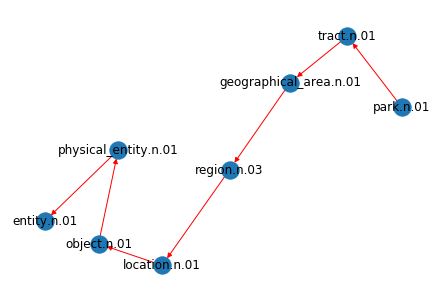

In [174]:
from networkx import DiGraph, draw

graph = DiGraph()

for node,parent in zip(parent_nodes, parent_nodes[1:]):
    graph.add_edge(node.name(), parent.name())

draw(graph, edge_color='r', with_labels=True)

Next for all words the similar process can be started and all of the possible nodes can be determined and thus creating a graph that displays all of the relationships. 

In [176]:
treeDict = {}
allNodesList=[]
for word in synsetList:
    currWord = wn.synset(word)
    allNodes = get_all_parent_nodes_wordnet(currWord,include_node_end=True)
    treeDict[word]= allNodes
    allNodesList+= allNodes


In [180]:
len(set(allNodesList))

255

In [187]:
# get a list of unique nodes 
uniqueNodes = list(set(allNodesList))
uniqueNodes.sort()

In [211]:
def add_vertex(v,vertices_no,vertices, graph ):
    if v in vertices: 
        print('vertex', v, 'already exists')
    else: 
        vertices_no =  vertices_no + 1
        vertices.append(v)
        if vertices_no > 1:  
            for vertex in graph: 
                vertex.append(0)
        temp = []
        for i in range(vertices_no):
            temp.append(0)
        graph.append(temp)
    return vertices, vertices_no, graph

In [212]:
# example of how to add a node to graph 
add_vertex(uniqueNodes[0], 0, [],[])

([Synset('abstraction.n.06')], 1, [[0]])

In [215]:
# add all vertices to graph 
vertList = []
numVertices = 0
graphRep = []

for i in range(len(uniqueNodes)):
    if i < 1:
        vertList, numVertices, graphRep = add_vertex(uniqueNodes[0],0, [],[])
    else:
        vertList, numVertices, graphRep = add_vertex(uniqueNodes[i],numVertices, vertList,graphRep)

In [218]:
# total number of vertices 
numVertices

255

In [221]:
def add_edge(v1, v2, e, vertices, graph):
    if v1 not in vertices:
        print('vertex', v1, 'does not exist')
        
    elif v2 not in vertices:
        print('vertex', v2, 'does not exist')
    else:
        index1 = vertices.index(v1)
        index2 = vertices.index(v2)
        graph[index1][index2] = e
    return graph

In [247]:
# add edges between all of the vertices that are connected 
for key, vals in treeDict.items():
    for i in range(len(vals)-1):
        graphRep = add_edge(vals[i], vals[i+1], 1, vertList, graphRep)
        graphRep = add_edge(vals[i+1], vals[i], 1, vertList, graphRep)

In [ ]:
After having determied a 

In [255]:
# crate an adjacency matrix representation of graph 
adjMatrix = pd.DataFrame(graphRep, columns = vertList)
adjMatrix = adjMatrix.set_index([vertList])
adjMatrix

,Synset('abstraction.n.06'),Synset('access.n.03'),Synset('accessible.a.01'),Synset('act.n.02'),Synset('action.n.01'),Synset('activity.n.01'),Synset('administrative_district.n.01'),Synset('air.n.01'),Synset('amorphous_shape.n.01'),Synset('angiosperm.n.01'),...,Synset('washroom.n.01'),Synset('waste.n.01'),Synset('way.n.06'),Synset('weather.n.01'),Synset('weed.n.01'),Synset('wheeled_vehicle.n.01'),Synset('whole.n.02'),Synset('woody_plant.n.01'),Synset('work.n.01'),Synset('yard.n.02')
Synset('abstraction.n.06'),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Synset('access.n.03'),0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Synset('accessible.a.01'),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Synset('act.n.02'),0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Synset('action.n.01'),0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Synset('wheeled_vehicle.n.01'),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Synset('whole.n.02'),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Synset('woody_plant.n.01'),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Synset('work.n.01'),0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
# save adj matrix for later use 
adjMatrix.to_csv('adjMatrix.csv')

After having saved the data in a csv file for later one can now create a graphical representation using networkX by iteratively adding edges and using matplotlib to finally plot the graph.

In [263]:
# load in adj matrix 
mydata = genfromtxt('adjMatrix.csv', delimiter=',')
print(mydata)
print(type(mydata))

[[nan nan nan ... nan nan nan]
 [nan  0.  0. ...  0.  0.  0.]
 [nan  0.  0. ...  0.  0.  0.]
 ...
 [nan  0.  0. ...  0.  0.  0.]
 [nan  0.  0. ...  0.  0.  0.]
 [nan  0.  0. ...  0.  0.  0.]]
<class 'numpy.ndarray'>


In [264]:
# extract matrix
adjacency = mydata[1:,1:]
print(adjacency)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [265]:
def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

In [340]:
# create adj matrix with correct column names 
matrixDf = adjMatrix.copy()
matrixDf = matrixDf.reset_index()
matrixDf.columns = matrixDf.columns.map(str)

In [531]:
# clean up column names 
newItems = []
dupList = ['change','line','bicycle','path', 'room','street', 'substance','travel', 'walk']
for item in list(matrixDf.columns)[1:]: 
    newItem = item.replace("Synset('","")
    newItem = newItem.replace("')","")
    if newItem.split('.')[0] not in dupList:
        newItems.append(newItem.split('.')[0])
    else:
        newItems.append(newItem)

In [345]:
# clean up column names
matrixDf.columns = ['synset'] + newItems
matrixDf['synset'] = newItems

In [346]:
# matrix with clean column names
matrixDf

,synset,abstraction,access,accessible,act,action,activity,administrative_district,air,amorphous_shape,...,washroom,waste,way,weather,weed,wheeled_vehicle,whole,woody_plant,work,yard
0,abstraction,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,access,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,accessible,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,act,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,action,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,wheeled_vehicle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,whole,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,woody_plant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,work,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [480]:
# create graph from adjacency matrix 
G = nx.Graph()
for col in matrixDf:
    if col != 'synset':
        for x in list(matrixDf.loc[matrixDf[col] == 1,'synset']):
            G.add_edge(col,x)

In [481]:
# determine degrees of each node
degrees = [val for (node, val) in G.degree()]
[(node, val) for (node, val) in G.degree()]

In [485]:
# example of finding edge of one node 
G.edges('bicycle.n.01')

EdgeDataView([('bicycle.n.01', 'wheeled_vehicle')])

In [486]:
# example of finding edge of one node 
G.edges('toilet')

EdgeDataView([('toilet', 'room.n.01'), ('toilet', 'washroom')])

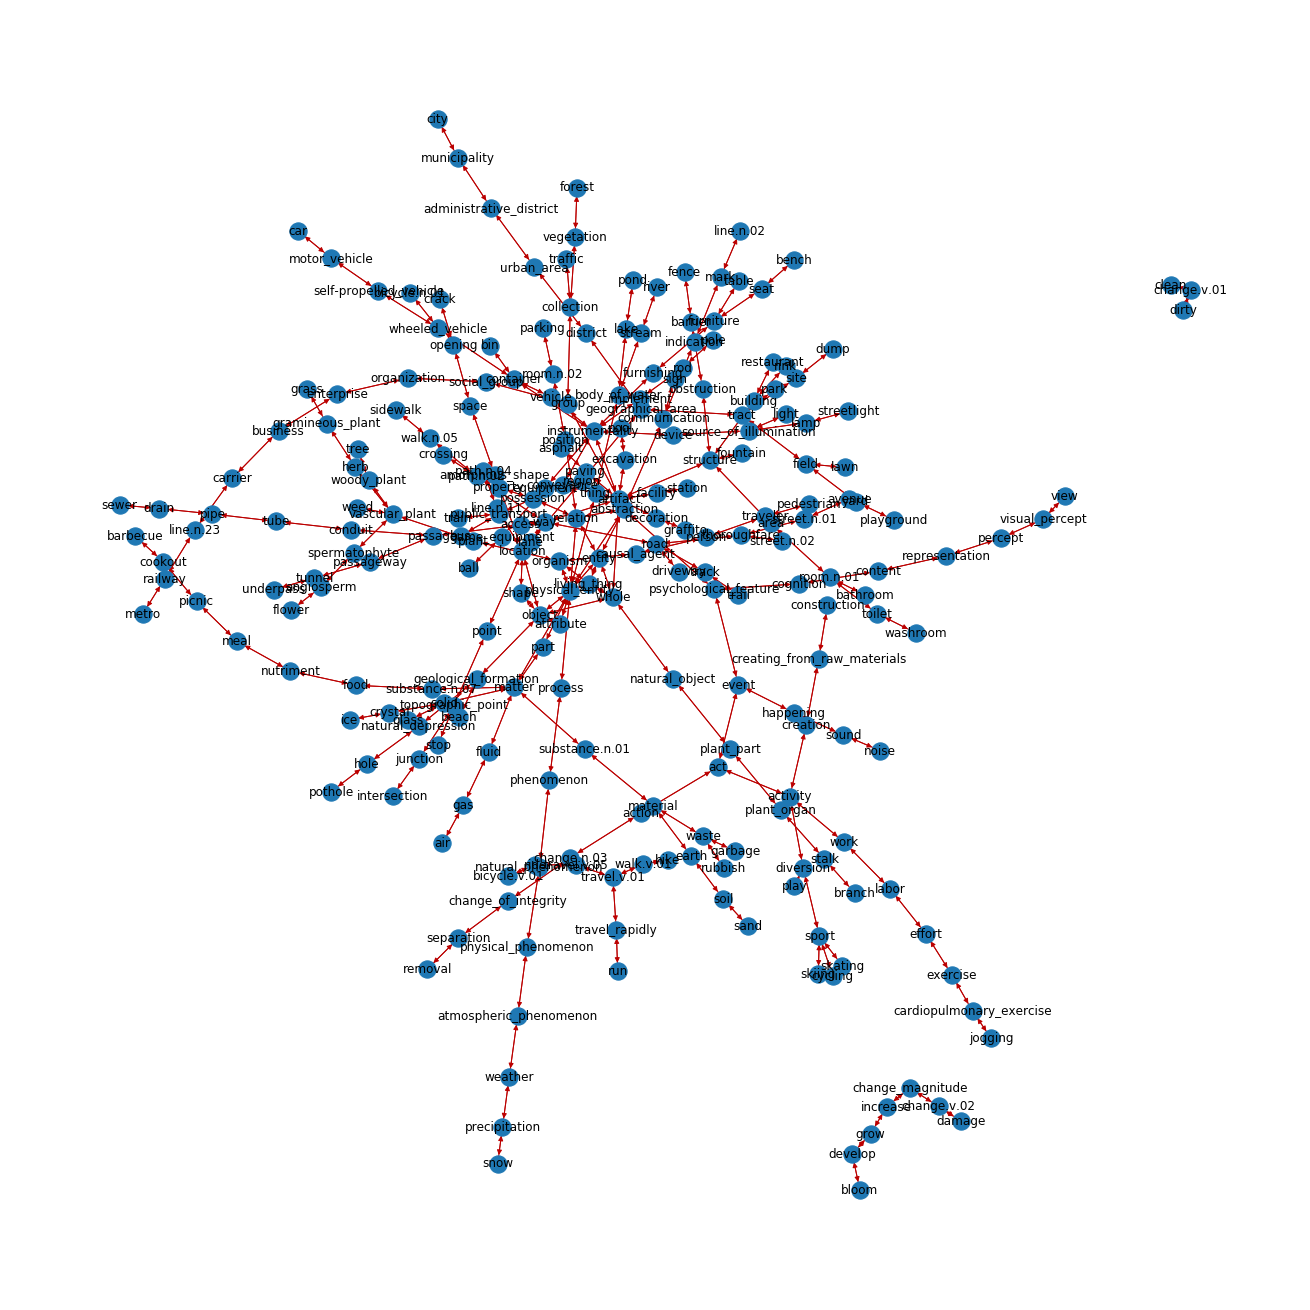

In [351]:
# visualize graph
plt.figure(figsize=(18,18))
nx.draw(G,edge_color='#BB0000',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph.png", dpi=1000)